In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(
    'https://gist.githubusercontent.com/andron23/f73a19243564d80a388db2b7b1542fd2/raw/2479b4326f6c8ae13d06060fb8510d04bcf06113/apteka.csv',
     sep=';'
)

In [3]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [4]:
df = df[df['card'].str.startswith('2000')]

In [5]:
df = df.sort_values(['card', 'datetime'])
df

,datetime,shop,card,bonus_earned,bonus_spent,summ,summ_with_disc,doc_id
641,2021-07-19 09:37:20,Аптека 2,2000200150015,0,1,21,21,15#2002822#65944#2_6
16455,2021-12-07 20:25:21,Аптека 2,2000200150022,30,0,1351,1351,15#2004825#66085#2_140
8751,2021-10-05 16:31:25,Аптека 2,2000200150053,15,0,649,649,15#2003981#66022#2_65
28718,2022-03-17 20:50:23,Аптека 7,2000200150053,1,0,64,64,15#11002624#66185#11_177
834,2021-07-21 11:10:25,Аптека 2,2000200150091,22,0,746,746,15#2002857#65946#2_4
...,...,...,...,...,...,...,...,...
38150,2022-06-07 17:08:45,Аптека 2,2000200259015,69,0,664,664,15#2003527#66267#2_73
38199,2022-06-07 19:19:12,Аптека 2,2000200259381,53,0,245,245,15#2003527#66267#2_109
38147,2022-06-07 19:37:59,Аптека 2,2000200259398,65,0,395,395,15#2003527#66267#2_113
38226,2022-06-08 09:46:52,Аптека 2,2000200259404,73,0,784,784,15#2003546#66268#2_7


In [6]:
df2 = df.groupby('card').agg(
    purchase_sum = ('summ_with_disc', 'sum'),
    purchase_amount = ('summ_with_disc', 'count'),
    last_purchase = ('datetime', 'last'),
).reset_index()
df2

,card,purchase_sum,purchase_amount,last_purchase
0,2000200150015,21,1,2021-07-19 09:37:20
1,2000200150022,1351,1,2021-12-07 20:25:21
2,2000200150053,713,2,2022-03-17 20:50:23
3,2000200150091,3549,5,2022-06-05 11:49:47
4,2000200150107,1735,3,2022-06-02 17:54:19
...,...,...,...,...
5921,2000200259015,664,1,2022-06-07 17:08:45
5922,2000200259381,245,1,2022-06-07 19:19:12
5923,2000200259398,395,1,2022-06-07 19:37:59
5924,2000200259404,784,1,2022-06-08 09:46:52


In [7]:
df2['days_since_last_purchase'] = (max(df['datetime']) - df2['last_purchase']).dt.days

In [8]:
import seaborn as sns

<Axes: >

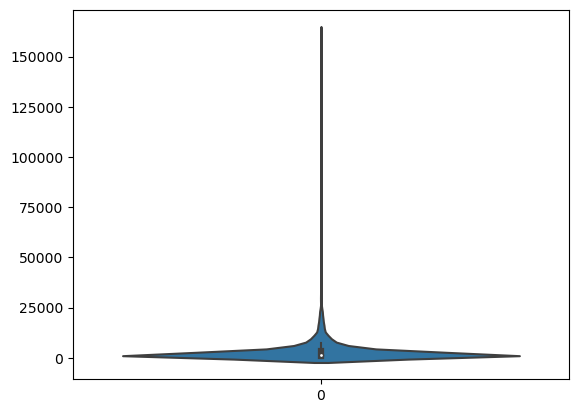

In [9]:
sns.violinplot(df2['purchase_sum'])

In [10]:
import numpy as np

In [11]:
quantiles = [round(el, 2) for el in np.arange(0.1, 1.1, 0.1)]

In [12]:
df3 = df2['purchase_sum'].quantile(quantiles)

0.1       405.5
0.2       620.0
0.3       844.0
0.4      1103.0
0.5      1470.5
0.6      2008.0
0.7      2731.0
0.8      4078.0
0.9      6906.5
1.0    162687.0
Name: purchase_sum, dtype: float64

In [20]:
df_with_two_columns = pd.DataFrame({
    'Quantiles': quantiles,
    'Purchase_Sum_Quantiles': df2['purchase_sum'].quantile(quantiles)
})
df_with_two_columns.reset_index().drop('index', axis=1)

,Quantiles,Purchase_Sum_Quantiles
0,0.1,405.5
1,0.2,620.0
2,0.3,844.0
3,0.4,1103.0
4,0.5,1470.5
5,0.6,2008.0
6,0.7,2731.0
7,0.8,4078.0
8,0.9,6906.5
9,1.0,162687.0


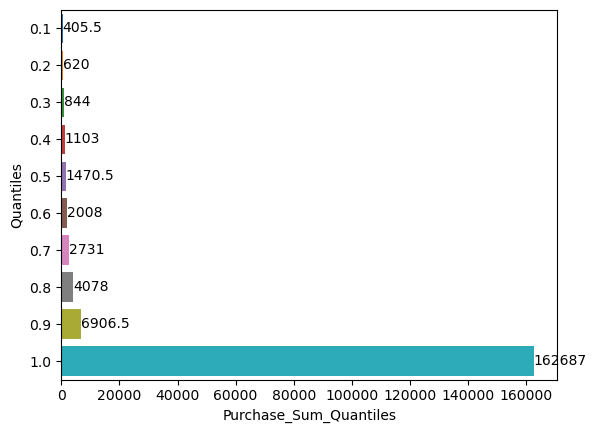

In [21]:
ax = sns.barplot(
    y = df_with_two_columns['Quantiles'],
    x = df_with_two_columns['Purchase_Sum_Quantiles'],
    orient='h'
)

ax.bar_label(ax.containers[-1]);